In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R




In [4]:
# Function to read .cam file and extract translation vector and rotation matrix
def read_cam_file(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()
        # Extract translation vector and rotation matrix from the first line
        first_line = list(map(float, lines[0].split()))
        translation_vector = np.array(first_line[:3])
        rotation_matrix = np.array(first_line[3:]).reshape(3, 3)
    return translation_vector, rotation_matrix

# Get all .cam files in the current folder
cam_files = [f for f in os.listdir('.') if f.endswith('.cam')]

# Separate L and R files
l_files = sorted([f for f in cam_files if '_L' in f])
r_files = sorted([f for f in cam_files if '_R' in f])

# Arrays to store rotation vectors
rotation_vectors_L = []
rotation_vectors_R = []

rotation_matrix_L=[]
rotation_matrix_R=[]
# Process L files
for l_file in l_files:
    _, rotation_matrix = read_cam_file(l_file)
    # Convert rotation matrix to rotation vector
    rotation_matrix_L.append(rotation_matrix)
    rotation_vector = R.from_matrix(rotation_matrix).as_rotvec()
    rotation_vectors_L.append(rotation_vector)

# Process R files
for r_file in r_files:
    _, rotation_matrix = read_cam_file(r_file)
    rotation_matrix_R.append(rotation_matrix)
    # Convert rotation matrix to rotation vector
    rotation_vector = R.from_matrix(rotation_matrix).as_rotvec()
    rotation_vectors_R.append(rotation_vector)

# Convert to numpy arrays
rotation_vectors_L = np.array(rotation_vectors_L)
rotation_vectors_R = np.array(rotation_vectors_R)

rotation_matrix_L=np.array(rotation_matrix_L)
rotation_matrix_R=np.array(rotation_matrix_R)

In [5]:
#rotation_vectors_R

In [6]:
0.67201112+2.40676774

3.07877886

In [7]:
a=np.linalg.norm(rotation_vectors_L,axis=1)
b=np.linalg.norm(rotation_vectors_R,axis=1)

a_norm=(rotation_vectors_L.T/a).T
b_norm=(rotation_vectors_R.T/b).T

In [8]:
a_avg=np.average(a_norm.T,axis=1)
b_avg=np.average(b_norm.T,axis=1)


L_avg=np.average(rotation_vectors_L.T,axis=1).T
R_avg=np.average(rotation_vectors_R.T,axis=1).T

In [9]:
L_avg_norm=L_avg/np.linalg.norm(L_avg)


R_avg_norm=R_avg/np.linalg.norm(R_avg)


#np.linalg.norm(a_avg-b_avg)*180/3.14

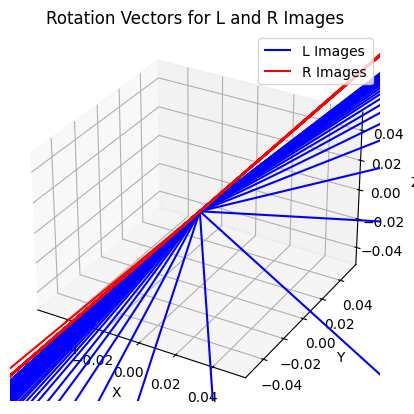

In [10]:
# Plot the rotation vectors in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot L vectors
ax.quiver(
    np.zeros(len(a_norm)), np.zeros(len(a_norm)), np.zeros(len(a_norm)),
    a_norm[:, 0], a_norm[:, 1], a_norm[:, 2],
    color='blue', label='L Images'
)

# Plot R vectors
ax.quiver(
    np.zeros(len(b_norm)), np.zeros(len(b_norm)), np.zeros(len(b_norm)),
    b_norm[:, 0], b_norm[:, 1], b_norm[:, 2],
    color='red', label='R Images'
)

# Add labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
ax.set_title('Rotation Vectors for L and R Images')

# Show the plot
plt.show()

In [11]:
()

()

In [23]:
np.linalg.norm(L_avg_norm-R_avg_norm)*180/3.14

2.1145043035430047

In [13]:
L_avg_norm

array([ 0.03451174, -0.99929624, -0.01469595])

In [14]:
R_avg_norm

array([ 5.18839587e-04, -9.99999788e-01, -3.92438508e-04])

In [15]:
#rotation_vectors_L

In [16]:
#rotation_vectors_R

In [18]:
a_r=find_rotation_axis(rotation_matrix_L)

In [19]:
b_r=find_rotation_axis(rotation_matrix_R)

In [20]:
np.linalg.norm(a_r-b_r)*180/3.14

1.2115661464128902

In [22]:
for i in rotation_matrix_L:
    print(get_rotation_axis(i))

[-0.01790722  0.99981992 -0.00628129]
[-0.01789768  0.99982038 -0.00623518]
[-0.01778125  0.99982071 -0.00650921]
[-0.01772986  0.99982068 -0.00665326]
[-0.01794647  0.99981898 -0.00631881]
[-0.01809783  0.99981761 -0.00610003]
[-0.01834863  0.99981715 -0.00538545]
[-0.01833219  0.99981555 -0.00572754]
[-0.0185258   0.9998142  -0.00532469]
[-0.01849738  0.99981419 -0.00542511]
[-0.01861996  0.99981287 -0.00524681]
[-0.0187029   0.99981249 -0.0050186 ]
[-0.01886439  0.99980939 -0.00503269]
[-0.01906677  0.99980745 -0.00463947]
[-0.0192125   0.99980525 -0.0045113 ]
[-0.01935086  0.99980249 -0.00453118]
[-0.01957219  0.99980011 -0.00408347]
[-0.01969308  0.9997982  -0.00396777]
[-0.02006892  0.99979259 -0.00346752]
[-0.02026222  0.99978943 -0.00324618]
[-0.02062181  0.99978368 -0.00270754]
[-0.02085216  0.99977954 -0.0024602 ]
[-0.02118667  0.99977332 -0.0021058 ]
[-0.02138466  0.99976971 -0.00179718]
[-0.02183911  0.9997607  -0.00126536]
[-2.21918858e-02  9.99753425e-01 -7.80840769e-04]
